In [233]:
import requests
import time
from bs4 import BeautifulSoup as BS
from selenium import webdriver
import re
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import math
import random
import scipy
import networkx as nx

In [127]:
df_work = pd.read_csv("films_data17.csv")

In [128]:
df_work

,title,bestRating,ratingValue,ratingCount,country,date,budget,actors,link,ratingValue_qcut
0,Дьявол носит Prada,10.0,7.688,564701.0,Франция,2006.0,"(35000000, '$')","['Мэрил Стрип', 'Энн Хэтэуэй', 'Эмили Блант', ...",/film/104992/,"(7.654, 7.868]"
1,Реквием по мечте,10.0,7.994,347862.0,США,2000.0,"(4500000, '$')","['Джаред Лето', 'Марлон Уайанс', 'Дженнифер Ко...",/film/367/,"(7.986, 8.03]"
2,Брат,10.0,8.294,1058539.0,Россия,1997.0,NaN,NaN,/film/41519/,"(8.268, 8.464]"
3,Король говорит!,10.0,8.016,343447.0,США,2010.0,"(15000000, '$')","['Колин Фёрт', 'Джеффри Раш', 'Хелена Бонем Ка...",/film/485311/,"(7.986, 8.03]"
4,Крестный отец,10.0,8.709,365075.0,США,1972.0,"(6000000, '$')","['Марлон Брандо', 'Аль Пачино', 'Джеймс Каан',...",/film/325/,"(8.672, 9.108]"
...,...,...,...,...,...,...,...,...,...,...
58,Интервью с вампиром,10.0,7.954,216284.0,США,1994.0,"(60000000, '$')","['Том Круз', 'Брэд Питт', 'Стивен Ри', 'Антони...",/film/8151/,NaN
59,Социальная сеть,10.0,7.729,309499.0,США,2010.0,"(50000000, '$')","['Джесси Айзенберг', 'Эндрю Гарфилд', 'Джастин...",/film/427198/,NaN
60,Гордость и предубеждение,10.0,8.027,283298.0,США,2005.0,"(28000000, '$')","['Кира Найтли', 'Мэттью Макфэдиен', 'Розамунд ...",/film/81733/,NaN
61,Запах женщины,10.0,8.448,285681.0,США,1992.0,"(31000000, '$')","['Аль Пачино', 'Крис О’Доннелл', 'Джеймс Ребхо...",/film/4871/,NaN


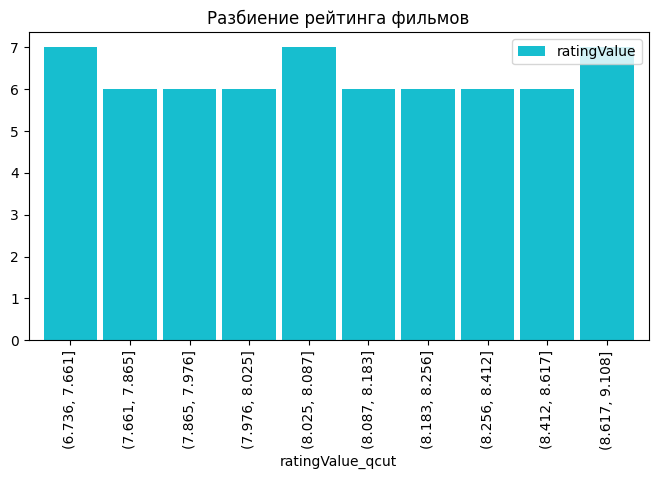

<Figure size 640x480 with 0 Axes>

In [129]:
df_work['ratingValue_qcut'] = pd.qcut(df_work['ratingValue'], 10)

df_work.groupby('ratingValue_qcut')['ratingValue'].count().plot.bar(color='C9',align='center',width=0.9,figsize=(8,4))

plt.title('Разбиение рейтинга фильмов')
plt.legend()
plt.show()
plt.savefig('Разбиение.png')

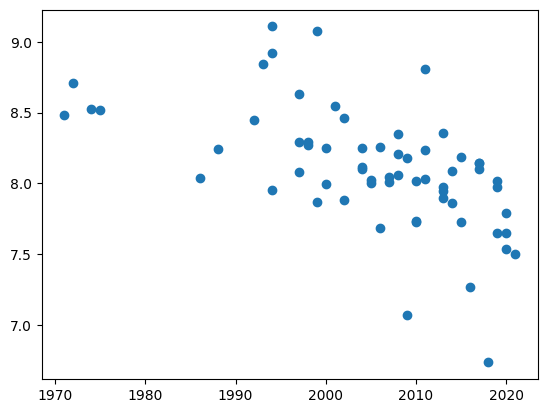

In [130]:
plt.scatter(df_work['date'],df_work['ratingValue'])

Text(0, 0.5, 'Частота')

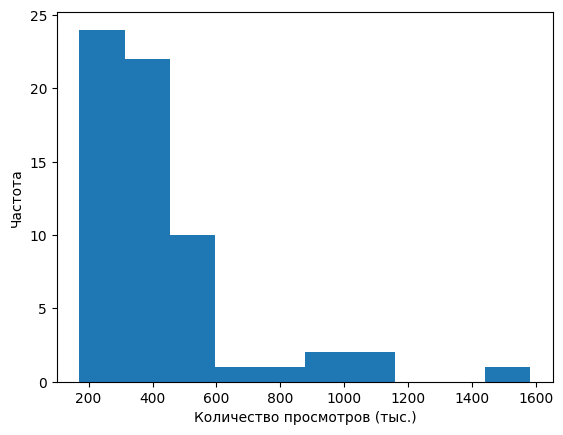

In [131]:
(df_work['ratingCount']/1000).plot.hist()
plt.xlabel('Количество просмотров (тыс.)')
plt.ylabel('Частота')

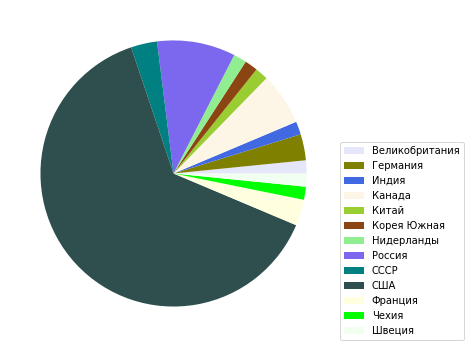

In [132]:
# df_work.groupby(df_work.country)['ratingValue'].count().plot.pie()
# plt.legend(labels=labels,loc=(1.5,0))
plt.figure(figsize=(10, 6), dpi=72)
plt.pie(df_work.groupby(df_work.country)['ratingValue'].count(),colors = random.choices(list(mlt.colors.CSS4_COLORS.values()),k = df_work.groupby(df_work.country).ngroups))
plt.legend(labels=df_work.groupby(df_work.country).groups,loc=(1,0))
plt.show()

Посчитаем бюджет

In [133]:
budget_amount = []
budget_currency = []
list_budget = list(df_work['budget'])
for i in range(len(list_budget)):
    if type(list_budget[i]) == str:
#         print(list_budget[i])
        list_budget[i] = list_budget[i][1:-1].split(',')  
        list_budget[i][0]=float(list_budget[i][0])
        list_budget[i][1]=str(list_budget[i][1])[1:]
    else:
        list_budget[i]=[np.nan,np.nan]
    budget_amount.append(list_budget[i][0])
    budget_currency.append(list_budget[i][1])
    




In [134]:
df_work['budget_amount'] = pd.Series(budget_amount)
df_work['budget_currency'] = pd.Series(budget_currency)

In [135]:
df_work.columns

Index(['title', 'bestRating', 'ratingValue', 'ratingCount', 'country', 'date',
       'budget', 'actors', 'link', 'ratingValue_qcut', 'budget_amount',
       'budget_currency'],
      dtype='object')

In [136]:
df_work.groupby('budget_currency')['title'].count()

budget_currency
'$'    52
'£'     1
'€'     1
'₽'     2
Name: title, dtype: int64

Исследование

In [137]:
df_work.groupby('budget_currency').groups

{''$'': [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 41, 42, 44, 45, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62], ''£'': [49], ''€'': [10], ''₽'': [18, 36]}

In [144]:
df_work_study = df_work.loc[df_work['budget_currency'] == "'$'" ][['ratingValue','ratingCount','budget_amount','date']].dropna() 

In [145]:
df_work_study

,ratingValue,ratingCount,budget_amount,date
0,7.688,564701.0,35000000.0,2006.0
1,7.994,347862.0,4500000.0,2000.0
3,8.016,343447.0,15000000.0,2010.0
4,8.709,365075.0,6000000.0,1972.0
5,8.239,381237.0,25000000.0,2011.0
6,7.654,535487.0,90000000.0,2019.0
7,8.275,512457.0,60000000.0,1998.0
8,7.973,1116855.0,100000000.0,2013.0
9,8.260,377046.0,55000000.0,2006.0
11,8.350,491514.0,16000000.0,2008.0


Мы хотим посчитать корреляцию между следующими показателями: рейтинг фильма, кол-во просмотров, вложенный бюджет.
Затем оценить её значимость




In [146]:
correlations = df_work_study.corr()
correlations.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,ratingValue,ratingCount,budget_amount,date
ratingValue,1.000000,0.452558,-0.109810,-0.608995
ratingCount,0.452558,1.000000,0.269514,-0.029268
budget_amount,-0.109810,0.269514,1.000000,0.259426
date,-0.608995,-0.029268,0.259426,1.000000


In [141]:
from scipy.stats import pearsonr
pearsonr(df_work_study.ratingValue,df_work_study.ratingCount) 
# Статистически значимо

PearsonRResult(statistic=0.4525582309752906, pvalue=0.000755771602685132)

In [142]:
pearsonr(df_work_study.ratingValue,df_work_study.budget_amount) 
# не статистически значимо

PearsonRResult(statistic=-0.10980964706427626, pvalue=0.43837075736230546)

In [143]:
pearsonr(df_work_study.ratingCount,df_work_study.budget_amount) 
# сильно зависит от того, какой уровень значимости хотим 

PearsonRResult(statistic=0.26951389471134535, pvalue=0.05333881603756887)

In [152]:
pearsonr(df_work_study.ratingCount,df_work_study.date)

PearsonRResult(statistic=-0.02926801936979133, pvalue=0.8368157401513273)

In [153]:
pearsonr(df_work_study.budget_amount,df_work_study.date)

PearsonRResult(statistic=0.2594264926787167, pvalue=0.06328095066512639)

In [154]:
pearsonr(df_work_study.ratingValue,df_work_study.date)

PearsonRResult(statistic=-0.6089950775351528, pvalue=1.6630053176846793e-06)

Сделаем статистический тест ради статистического теста

У нас есть данные с 1970 по 2020.

Давайте про тестируем гипотезу о том, что "раньше" фильмы были лучше, чем "сейчас" (по субъективному восприятию зрителей)
Нулевая гипотеза: рейтинг фильмов до 2000 года выше, чем после. 

In [169]:
year_median = df_work.date.median()

In [197]:
df_work_test_a = df_work.loc[df_work['date'] <= year_median][['ratingValue']].dropna() 
df_work_test_b = df_work.loc[df_work['date'] > year_median][['ratingValue']].dropna() 

In [198]:
scipy.stats.ttest_ind_from_stats(mean1 = df_work_test_a.mean(), mean2 = df_work_test_b.mean(), nobs1 = df_work_test_a.count(), nobs2 =df_work_test_b.count() , std1 = df_work_test_a.std(),std2 = df_work_test_b.std(), alternative='greater')


Ttest_indResult(statistic=ratingValue    4.284463
dtype: float64, pvalue=ratingValue    0.000033
dtype: float64)

Зачем такой тест, если и так всё понятно по среднему? на случай разброса данных. 
пример

df_work_test_a = pd.Series([1,1,1,5])  
df_work_test_b = pd.Series([2,2,2,1])

где фильмы лучше?

In [425]:
# s = df_work[['actors']].dropna(how='any').iat[0,0]

In [426]:
# s

"['Мэрил Стрип', 'Энн Хэтэуэй', 'Эмили Блант', 'Стэнли Туччи', 'Саймон Бейкер', 'Эдриан Гренье', 'Трейси Томс', 'Рич Соммер', 'Дэниел Сунджата', 'Дэвид Маршалл Грант']"

Теперь займёмся нашими актёрами. Давайте узнаем кто с кем больше любит играть и построим по ним граф 
вопрос нахуя? остаётся висеть в воздухе, как как и вопрос нахуя нам этот курс с его заданиямию

In [230]:
# s[2:-2].split("', '")

['Мэрил Стрип',
 'Энн Хэтэуэй',
 'Эмили Блант',
 'Стэнли Туччи',
 'Саймон Бейкер',
 'Эдриан Гренье',
 'Трейси Томс',
 'Рич Соммер',
 'Дэниел Сунджата',
 'Дэвид Маршалл Грант']

In [446]:
actors = []
actors_dic = {}
for ind in range(df_work.actors.dropna(how='any').count()):
    if type(df_work.actors[ind]) == str:
        s = df_work[['actors']].dropna(how='any').iat[ind,0]
        m = s[2:-2].split("', '") #Приводим данные к читабельному виду.
        for i in range(len(m)-1):
            for j in range(i+1,len(m)):
                if tuple([m[i],m[j]]) in actors_dic.keys():
                    actors_dic[tuple([m[i],m[j]])] += 1
                else:
                    actors_dic[tuple([m[i],m[j]])] = 1
        actors = actors + m
        actors = list(set(actors))
        actors_dic

In [451]:
actors_key_nets = {}
for key in actors_dic:
    if actors_dic[key]>1:
        actors_key_nets[key]=actors_dic[key]

In [452]:
actors_key_nets

{('Леонардо ДиКаприо', 'Марго Робби'): 2,
 ('Леонардо ДиКаприо', 'Джона Хилл'): 2,
 ('Кира Найтли', 'Бренда Блетин'): 2}

In [459]:
actors=sum(actors_key_nets.keys(),())

In [388]:
# m = ['Jork','Zoi','Peter','Frank']
# m = ['Jork','Zoi','Sebastyan']
# m = ['Zoi','Frank','Sebastyan']
# m = ['Zoi','Peter']
m = ['Marc']
# Запускала по очереди, увеличивая датасет актёров
# Как будто одна m - это набор актёров в 1 фильме

for i in range(len(m)-1):
    for j in range(i+1,len(m)):
        if tuple([m[i],act2[j]]) in actors_dic.keys():
            actors_dic[tuple([m[i],m[j]])] += 1
        else:
            actors_dic[tuple([m[i],m[j]])] = 1
actors = actors + m
actors = list(set(actors))
actors_dic

{('Jork', 'Zoi'): 2,
 ('Jork', 'Peter'): 1,
 ('Jork', 'Frank'): 1,
 ('Zoi', 'Peter'): 3,
 ('Zoi', 'Frank'): 2,
 ('Peter', 'Frank'): 1,
 ('Jork', 'Sebastyan'): 1,
 ('Zoi', 'Sebastyan'): 1,
 ('Frank', 'Sebastyan'): 1}

In [389]:
actors

['Zoi', 'Marc', 'Frank', 'Jork', 'Sebastyan', 'Peter']

{('Леонардо ДиКаприо',
  'Марго Робби'): Text(0.654508476093664, 0.47552828417802706, '2'),
 ('Леонардо ДиКаприо',
  'Джона Хилл'): Text(0.09549147175227024, 0.2938926307527015, '2'),
 ('Кира Найтли',
  'Бренда Блетин'): Text(-0.24999994784593424, -0.7694209149307285, '2')}

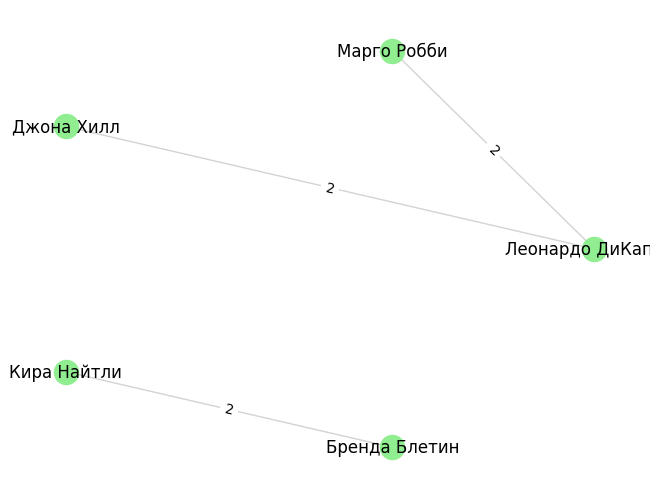

In [462]:
G = nx.Graph()
G.add_nodes_from(actors)
G.add_edges_from(actors_key_nets)
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = True,arrows=True,node_color= 'lightgreen',edge_color='lightgrey')
nx.draw_networkx_edge_labels(G, pos, edge_labels=actors_key_nets)